<a href="https://colab.research.google.com/github/cosminnedescu/ProjectMLDL/blob/main/plots/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.ticker import PercentFormatter

In [2]:
!rm -rf ProjectMLDL
if not os.path.isdir('/content/ProjectMLDL'):
  !git clone https://github.com/cosminnedescu/ProjectMLDL.git
  %cd /content/ProjectMLDL
  !rm -rf LICENSE README.md

Cloning into 'ProjectMLDL'...
remote: Enumerating objects: 3743, done.
remote: Counting objects: 100% (1159/1159), done.
remote: Compressing objects: 100% (587/587), done.
remote: Total 3743 (delta 673), reused 957 (delta 553), pack-reused 2584
Receiving objects: 100% (3743/3743), 186.72 MiB | 32.09 MiB/s, done.
Resolving deltas: 100% (2058/2058), done.
/content/ProjectMLDL


# Plot Test Accuracies: Baselines

In [ ]:
jsonfile = open("states/FineTuning/FineTuning_test_accuracy.json")
FineTuning_test_accuracy = json.load(jsonfile)

jsonfile = open("states/JointTraining/JointTraining_test_accuracy.json")
JointTraining_test_accuracy = json.load(jsonfile)

jsonfile = open("states/LWF/LWF_test_accuracy.json")
LWF_test_accuracy =json.load(jsonfile)

jsonfile = open("states/iCaRL_Hybrid1/iCaRL_test_accuracy_hybrid1.json")
Hybrid1_test_accuracy =json.load(jsonfile)

jsonfile = open("states/iCaRL/iCaRL_test_accuracy.json")
iCaRL_test_accuracy =json.load(jsonfile)

In [ ]:
FineTuning_test_accuracy = np.array(FineTuning_test_accuracy)
JointTraining_test_accuracy = np.array(JointTraining_test_accuracy)
LWF_test_accuracy = np.array(LWF_test_accuracy)
Hybrid1_test_accuracy = np.array(Hybrid1_test_accuracy)
iCaRL_test_accuracy = np.array(iCaRL_test_accuracy)

FineTuning_test_accuracy_stats = np.array([FineTuning_test_accuracy.mean(0), FineTuning_test_accuracy.std(0)]).transpose()
JointTraning_test_accuracy_stats = np.array([JointTraining_test_accuracy.mean(0), JointTraining_test_accuracy.std(0)]).transpose()
LWF_test_accuracy_stats = np.array([LWF_test_accuracy.mean(0), LWF_test_accuracy.std(0)]).transpose()
Hybrid1_test_accuracy_stats = np.array([Hybrid1_test_accuracy.mean(0), Hybrid1_test_accuracy.std(0)]).transpose()
iCaRL_test_accuracy_stats = np.array([iCaRL_test_accuracy.mean(0), iCaRL_test_accuracy.std(0)]).transpose()

In [ ]:
print(f"Average test accuracy:")
FineTuning_test_accuracy_avg = FineTuning_test_accuracy_stats[:, 0].mean()
print(f"Fine Tuning:  {FineTuning_test_accuracy_avg}")
LWF_test_accuracy_avg = LWF_test_accuracy_stats[:, 0].mean()
print(f"LWF:  {LWF_test_accuracy_avg}")
Hybrid1_test_accuracy_avg = Hybrid1_test_accuracy_stats[:, 0].mean()
print(f"Hybrid1:  {Hybrid1_test_accuracy_avg}")
iCaRL_test_accuracy_avg = iCaRL_test_accuracy_stats[:, 0].mean()
print(f"iCaRL:  {iCaRL_test_accuracy_avg}")
JointTraining_test_accuracy_avg = JointTraning_test_accuracy_stats[:, 0].mean()
print(f"JointTraining:  {JointTraining_test_accuracy_avg}")

Average test accuracy:
Fine Tuning:  0.23839697963635112
LWF:  0.4178301829897567
Hybrid1:  0.5040855704025555
iCaRL:  0.5573148547281831
JointTraining:  0.7366146058691495


In [ ]:
def plot_test_accuracy(finetuning, jointtraining, lwf, hybrid1, icarl, save_directory = None):
  finetuning_mean = np.array(finetuning)[:, 0]
  finetuning_std = np.array(finetuning)[:, 1]
  jointtraining_mean = np.array(jointtraining)[:, 0]
  jointtraining_std = np.array(jointtraining)[:, 1]
  lfw_mean = np.array(lwf)[:, 0]
  lfw_std = np.array(lwf)[:, 1]
  hybrid1_mean = np.array(hybrid1)[:, 0]
  hybrid1_std = np.array(hybrid1)[:, 1]
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  fig, ax = plt.subplots(figsize = (6, 6), dpi = 900)
  x = np.arange(10, 101, 10)
  plt.ylim([0.05, 0.95])
  ax.errorbar(x, jointtraining_mean, jointtraining_std, label = 'JointTraining')
  ax.errorbar(x, finetuning_mean, finetuning_std, label = 'FineTuning')
  ax.errorbar(x, lfw_mean, lfw_std, label = 'LearningWithoutForgetting')
  ax.errorbar(x, hybrid1_mean, hybrid1_std, label = 'Hybrid1')
  ax.errorbar(x, icarl_mean, icarl_std, label = 'iCaRL')
  ax.set_xlabel("Number of classes")
  plt.tight_layout()
  plt.grid(axis='y')
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(FineTuning_test_accuracy_stats, 
                   JointTraning_test_accuracy_stats, 
                   LWF_test_accuracy_stats, 
                   Hybrid1_test_accuracy_stats,
                   iCaRL_test_accuracy_stats,
                   "baselines_acc")

In [ ]:
jsonfile = open("states/LWF/LWF_test_accuracy.json")
LWF_test_accuracy =json.load(jsonfile)
LWF_test_accuracy = np.array(LWF_test_accuracy)
LWF_test_accuracy_stats = np.array([LWF_test_accuracy.mean(0) * 100, LWF_test_accuracy.std(0) * 100]).transpose()

jsonfile = open("states/LWF/LWF_test_accuracy_trainer_validate.json")
LWF_test_accuracy_tv =json.load(jsonfile)
LWF_test_accuracy_tv = np.array(LWF_test_accuracy_tv)
LWF_test_accuracy_tv_stats = np.array([LWF_test_accuracy_tv.mean(0) * 100, LWF_test_accuracy_tv.std(0) * 100]).transpose()

In [ ]:
def plot_test_accuracy(lwf, lwf_tv, save_directory = None):
  lfw_mean = np.array(lwf)[:, 0]
  lfw_std = np.array(lwf)[:, 1]
  tv_mean = np.array(lwf_tv)[:, 0]
  tv_std = np.array(lwf_tv)[:, 1]
  fig, ax = plt.subplots(figsize = (10, 5), dpi = 100)
  x = np.arange(10, 101, 10)
  ax.errorbar(x, lfw_mean, lfw_std, label = 'LearningWithoutForgetting')
  ax.errorbar(x, tv_mean, tv_std, label = 'LearningWithoutForgetting_TV')
  ax.set_xlabel("Number of classes")
  plt.tight_layout()
  plt.title("Test Accuracies", loc="center")
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(LWF_test_accuracy_stats, 
                   LWF_test_accuracy_tv_stats)

# Plot Test Accuracies Ablation Study: Losses

In [3]:
jsonfile = open("states/iCaRL/iCaRL_test_accuracy.json")
iCaRL_test_accuracy = json.load(jsonfile)
iCaRL_test_accuracy = np.array(iCaRL_test_accuracy)
iCaRL_test_accuracy_stats = np.array([iCaRL_test_accuracy.mean(0), iCaRL_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_Cosine/iCaRL_Loss_Cosine_test_accuracy.json")
Cosine_test_accuracy = json.load(jsonfile)
Cosine_test_accuracy = np.array(Cosine_test_accuracy)
Cosine_test_accuracy_stats = np.array([Cosine_test_accuracy.mean(0), Cosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_L1/iCaRL_Loss_L1_test_accuracy.json")
L1_test_accuracy =json.load(jsonfile)
L1_test_accuracy = np.array(L1_test_accuracy)
L1_test_accuracy_stats = np.array([L1_test_accuracy.mean(0), L1_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_L2/iCaRL_Loss_L2_test_accuracy.json")
L2_test_accuracy =json.load(jsonfile)
L2_test_accuracy = np.array(L2_test_accuracy)
L2_test_accuracy_stats = np.array([L2_test_accuracy.mean(0), L2_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_Cosine/iCaRL_Loss_Cosine_features_test_accuracy.json")
fCosine_test_accuracy = json.load(jsonfile)
fCosine_test_accuracy = np.array(fCosine_test_accuracy)
fCosine_test_accuracy_stats = np.array([fCosine_test_accuracy.mean(0), fCosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_L2/iCaRL_Loss_L2_features_test_accuracy.json")
fL2_test_accuracy =json.load(jsonfile)
fL2_test_accuracy = np.array(fL2_test_accuracy)
fL2_test_accuracy_stats = np.array([fL2_test_accuracy.mean(0), fL2_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_L1/iCaRL_Loss_L1_features_test_accuracy.json")
fL1_test_accuracy =json.load(jsonfile)
fL1_test_accuracy = np.array(fL1_test_accuracy)
fL1_test_accuracy_stats = np.array([fL1_test_accuracy.mean(0), fL1_test_accuracy.std(0)]).transpose()

In [ ]:
print(f"Average test accuracy:")
iCaRL_test_accuracy_avg = iCaRL_test_accuracy_stats[:, 0].mean()
print(f"BCE+BCE:  {iCaRL_test_accuracy_avg}")
Cosine_test_accuracy_avg = Cosine_test_accuracy_stats[:, 0].mean()
print(f"CE+Cosine on FC:  {Cosine_test_accuracy_avg}")
fCosine_test_accuracy_avg = fCosine_test_accuracy_stats[:, 0].mean()
print(f"CE+Cosine on Features:  {fCosine_test_accuracy_avg}")
L1_test_accuracy_avg = L1_test_accuracy_stats[:, 0].mean()
print(f"CE+L1 on FC:  {L1_test_accuracy_avg}")
fL1_test_accuracy_avg = fL1_test_accuracy_stats[:, 0].mean()
print(f"CE+L1 on Features:  {fL1_test_accuracy_avg}")
L2_test_accuracy_avg = L2_test_accuracy_stats[:, 0].mean()
print(f"CE+L2 on FC:  {L2_test_accuracy_avg}")
fL2_test_accuracy_avg = fL2_test_accuracy_stats[:, 0].mean()
print(f"CE+L2 on Features:  {fL2_test_accuracy_avg}")

Average test accuracy:
BCE+BCE:  0.5573148547281831
CE+Cosine on FC:  0.585579229995283
CE+Cosine on Features:  0.5640569600988095
CE+L1 on FC:  0.533209131746379
CE+L1 on Features:  0.5822746337073637
CE+L2 on FC:  0.5508251751746449
CE+L2 on Features:  0.58008917587448


In [47]:
def plot_test_accuracy(icarl, cosine, l1, l2, fcosine, fl1, fl2, save_directory = None):
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  cosine_mean = np.array(cosine)[:, 0]
  cosine_std = np.array(cosine)[:, 1]
  l1_mean = np.array(l1)[:, 0]
  l1_std = np.array(l1)[:, 1]
  l2_mean = np.array(l2)[:, 0]
  l2_std = np.array(l2)[:, 1]
  fcosine_mean = np.array(fcosine)[:, 0]
  fcosine_std = np.array(fcosine)[:, 1]
  fl1_mean = np.array(fl1)[:, 0]
  fl1_std = np.array(fl1)[:, 1]
  fl2_mean = np.array(fl2)[:, 0]
  fl2_std = np.array(fl2)[:, 1]
  fig, ax1 = plt.subplots(figsize = (7, 7))
  x = np.arange(10, 101, 10)
  plt.ylim([0.30, 0.90])
  ax1.errorbar(x, icarl_mean, icarl_std, label = 'BCE + BCE', color='blue')
  #ax2.errorbar(x, icarl_mean, icarl_std, label = 'BCE + BCE', color='blue')
  #ax2.errorbar(x, fcosine_mean, fcosine_std, label = 'CE + Cosine on features', color='green')
  ax1.errorbar(x, cosine_mean, cosine_std, label = 'CE + Cosine on logits', color='green')
  ax1.errorbar(x, l1_mean, l1_std, label = 'CE + L1 on logits', color='orange')
  #ax2.errorbar(x, fl1_mean, fl1_std, label = 'CE + L1 on features', color='orange')
  ax1.errorbar(x, l2_mean, l2_std, label = 'CE + L2 on logits', color='red')
  #ax2.errorbar(x, fl2_mean, fl2_std, label = 'CE + L2 on features', color='red')
  ax1.set_xlabel("Number of classes")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.grid(axis='y')
  plt.tight_layout()
  plt.rcParams.update({'font.size': 18})
  ax1.legend()
  #ax2.legend()
  # ax3.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

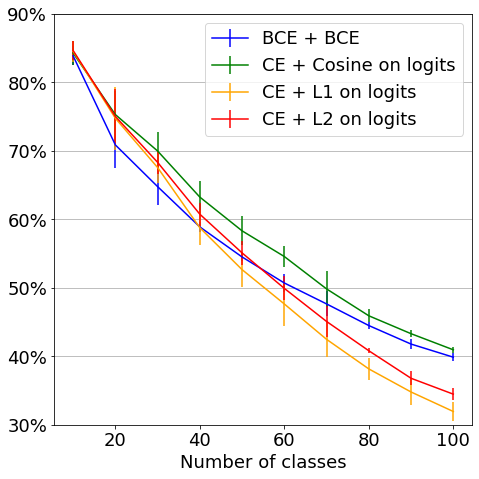

In [48]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   Cosine_test_accuracy_stats,
                   L1_test_accuracy_stats,
                   L2_test_accuracy_stats,
                   fCosine_test_accuracy_stats,
                   fL1_test_accuracy_stats,
                   fL2_test_accuracy_stats)

In [ ]:
def plot_test_accuracy(icarl, cosine, l1, save_directory = None):
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  cosine_mean = np.array(cosine)[:, 0]
  cosine_std = np.array(cosine)[:, 1]
  l1_mean = np.array(l1)[:, 0]
  l1_std = np.array(l1)[:, 1]
  #l2_mean = np.array(l2)[:, 0]
  #l2_std = np.array(l2)[:, 1]
  fig, ax = plt.subplots(figsize = (7, 7), dpi = 900)
  x = np.arange(10, 101, 10)
  plt.ylim([0.05, 0.95])
  ax.errorbar(x, icarl_mean, icarl_std, label = 'BCE + BCE') 
  ax.errorbar(x, l1_mean, l1_std, label = 'CE + L2 on Features')
  ax.errorbar(x, cosine_mean, cosine_std, label = 'CE + L2 on FC')
  #ax.errorbar(x, l2_mean, l2_std, label = 'CE+L2')
  ax.set_xlabel("Number of classes")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.grid(axis='y')
  plt.tight_layout()
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   Cosine_test_accuracy_stats,
                   fCosine_test_accuracy_stats,
                   'cos_acc')

In [ ]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   L1_test_accuracy_stats,
                   fL1_test_accuracy_stats,
                   "l1_acc")

In [ ]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   L2_test_accuracy_stats,
                   fL2_test_accuracy_stats,
                   "l2_acc")

# Plot Test Accuracies Ablation Study: Classifiers

In [49]:
jsonfile = open("states/iCaRL/iCaRL_test_accuracy.json")
iCaRL_test_accuracy = json.load(jsonfile)
iCaRL_test_accuracy = np.array(iCaRL_test_accuracy)
iCaRL_test_accuracy_stats = np.array([iCaRL_test_accuracy.mean(0), iCaRL_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Classifier_CosineLayer/iCaRL_Classifier_Cosine_test_accuracy.json")
Cosine_test_accuracy = json.load(jsonfile)
Cosine_test_accuracy = np.array(Cosine_test_accuracy)
Cosine_test_accuracy_stats = np.array([Cosine_test_accuracy.mean(0), Cosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Classifier_SVM/iCaRL_Classifier_SVM_test_accuracy.json")
SVM_test_accuracy =json.load(jsonfile)
SVM_test_accuracy = np.array(SVM_test_accuracy)
SVM_test_accuracy_stats = np.array([SVM_test_accuracy.mean(0), SVM_test_accuracy.std(0)]).transpose()

In [ ]:
jsonfile = open("states/iCaRL_Loss_Cosine/iCaRL_Loss_Cosine_final_test_accuracy.json")
fCosine_test_accuracy = json.load(jsonfile)
fCosine_test_accuracy = np.array(fCosine_test_accuracy)
fCosine_test_accuracy_stats = np.array([fCosine_test_accuracy.mean(0), fCosine_test_accuracy.std(0)]).transpose()

In [ ]:
print(f"Average test accuracy:")
iCaRL_test_accuracy_avg = iCaRL_test_accuracy_stats[:, 0].mean()
print(f"NME:  {iCaRL_test_accuracy_avg}")
SVM_test_accuracy_avg = SVM_test_accuracy_stats[:, 0].mean()
print(f"SVM:  {SVM_test_accuracy_avg}")
Cosine_test_accuracy_avg = Cosine_test_accuracy_stats[:, 0].mean()
print(f"Cosine Layer:  {Cosine_test_accuracy_avg}")
fCosine_test_accuracy_avg = fCosine_test_accuracy_stats[:, 0].mean()
print(f"Cosine Layer + Cosine on FC:  {fCosine_test_accuracy_avg}")

Average test accuracy:
NME:  0.5573148547281831
SVM:  0.5384595232303712
Cosine Layer:  0.5840216324272104
Cosine Layer + Cosine on FC:  0.5922241881154122


In [ ]:
fCosine_test_accuracy_avg = fCosine_test_accuracy_stats[:5, 0].mean()
print(f"Cosine Layer + Cosine on FC:  {fCosine_test_accuracy_avg}")

Cosine Layer + Cosine on FC:  0.7127270866405684


In [50]:
def plot_test_accuracy(icarl, cosine, svm, save_directory = None):
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  cosine_mean = np.array(cosine)[:, 0]
  cosine_std = np.array(cosine)[:, 1]
  svm_mean = np.array(svm)[:, 0]
  svm_std = np.array(svm)[:, 1]
  fig, ax = plt.subplots(figsize = (7, 7))
  x = np.arange(10, 101, 10)
  plt.ylim([0.30, 0.90])
  ax.errorbar(x, icarl_mean, icarl_std, label = 'FC + NME', color='blue')
  ax.errorbar(x, svm_mean, svm_std, label = 'FC + SVM', color='red')
  ax.errorbar(x, cosine_mean, cosine_std, label = 'Cosine Layer + NME', color='green')
  ax.set_xlabel("Number of classes")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.grid(axis='y')
  plt.tight_layout()
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

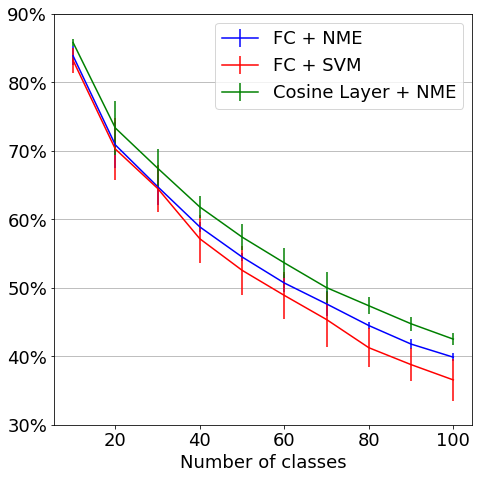

In [51]:
plot_test_accuracy(iCaRL_test_accuracy_stats, 
                   Cosine_test_accuracy_stats,
                   SVM_test_accuracy_stats,
                   "clf_acc")

# Plot Test Accuracies Ablation Study: Final Results

In [ ]:
jsonfile = open("states/iCaRL_Classifier_CosineLayer/iCaRL_Classifier_Cosine_test_accuracy.json")
Cosine_test_accuracy = json.load(jsonfile)
Cosine_test_accuracy = np.array(Cosine_test_accuracy)
Cosine_test_accuracy_stats = np.array([Cosine_test_accuracy.mean(0), Cosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_Cosine/iCaRL_Loss_Cosine_final_test_accuracy.json")
xCosine_test_accuracy = json.load(jsonfile)
xCosine_test_accuracy = np.array(xCosine_test_accuracy)
xCosine_test_accuracy_stats = np.array([xCosine_test_accuracy.mean(0), xCosine_test_accuracy.std(0)]).transpose()

jsonfile = open("states/iCaRL_Loss_Cosine/iCaRL_Loss_Cosine_features_test_accuracy.json")
fCosine_test_accuracy = json.load(jsonfile)
fCosine_test_accuracy = np.array(fCosine_test_accuracy)
fCosine_test_accuracy_stats = np.array([fCosine_test_accuracy.mean(0), fCosine_test_accuracy.std(0)]).transpose()

In [ ]:
def plot_test_accuracy(icarl, cosine, svm, save_directory = None):
  icarl_mean = np.array(icarl)[:, 0]
  icarl_std = np.array(icarl)[:, 1]
  cosine_mean = np.array(cosine)[:, 0]
  cosine_std = np.array(cosine)[:, 1]
  svm_mean = np.array(svm)[:, 0]
  svm_std = np.array(svm)[:, 1]
  fig, ax = plt.subplots(figsize = (6, 6), dpi = 900)
  x = np.arange(10, 101, 10)
  plt.ylim([0.05, 0.95])
  ax.errorbar(x, icarl_mean, icarl_std, label = 'Cosine Layer + BCE+BCE')
  ax.errorbar(x, svm_mean, svm_std, label = 'FC Layer + CE+Cosine')
  ax.errorbar(x, cosine_mean, cosine_std, label = 'Cosine Layer + CE+Cosine')
  ax.set_xlabel("Number of classes")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.grid(axis='y')
  plt.tight_layout()
  ax.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_test_accuracy(Cosine_test_accuracy_stats, 
                   xCosine_test_accuracy_stats,
                   fCosine_test_accuracy_stats,
                   "clf_cos_acc")

# Plot Confusion Matrix

In [ ]:
from data.utils_plot import plot_confusion_matrix

In [ ]:
jsonfile = open("states/ConfusionMatrix/FineTuning_predictions.json")
FineTuning_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/FineTuning_true_labels.json")
FineTuning_true_labels =json.load(jsonfile)

In [ ]:
jsonfile = open("states/ConfusionMatrix/LWF_predictions.json")
LWF_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/LWF_true_labels.json")
LWF_true_labels =json.load(jsonfile)

In [ ]:
jsonfile = open("states/ConfusionMatrix/iCaRL_predictions_hybrid1.json")
Hybrid1_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/iCaRL_true_labels_hybrid1.json")
Hybrid1_true_labels =json.load(jsonfile)

In [ ]:
jsonfile = open("states/ConfusionMatrix/iCaRL_predictions.json")
iCaRL_predictions =json.load(jsonfile)

jsonfile = open("states/ConfusionMatrix/iCaRL_true_labels.json")
iCaRL_true_labels =json.load(jsonfile)

Fine Tuning Confusion Matrix

In [ ]:
preds = np.array(FineTuning_predictions[1])
targets = np.array(FineTuning_true_labels[1])

f, axes = plt.subplots(1, 1, figsize=(7,7), dpi=1200)
cf_matrix = confusion_matrix(targets, preds)
ax1 = sns.heatmap(cf_matrix,cmap='coolwarm', yticklabels=False, xticklabels=False, cbar=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.get_figure().savefig("conf_finetuning")

Learning Without Forgetting Confusion Matrix

In [ ]:
preds = np.array(LWF_predictions[1])
targets = np.array(LWF_true_labels[1])

f, axes = plt.subplots(1, 1, figsize=(7,7), dpi=1200)
cf_matrix = confusion_matrix(targets, preds)
ax1 = sns.heatmap(cf_matrix,cmap='coolwarm', yticklabels=False, xticklabels=False, cbar=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.get_figure().savefig("conf_LWF")

Hybrid1 Confusion Matrix 

In [ ]:
preds = np.array(Hybrid1_predictions[1])
targets = np.array(Hybrid1_true_labels[1])

f, axes = plt.subplots(1, 1, figsize=(7,7), dpi=1200)
cf_matrix = confusion_matrix(targets, preds)
ax1 = sns.heatmap(cf_matrix,cmap='coolwarm', yticklabels=False, xticklabels=False, cbar=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.get_figure().savefig("conf_hybrid1")

iCaRL Confusion Matrix

In [ ]:
preds = np.array(iCaRL_predictions[1])
targets = np.array(iCaRL_true_labels[1])

f, axes = plt.subplots(1, 1, figsize=(7, 7), dpi=1200)
cf_matrix = confusion_matrix(targets, preds)
ax1 = sns.heatmap(cf_matrix,cmap='coolwarm', yticklabels=False, xticklabels=False, cbar=False)
ax1.axes.get_yaxis().set_visible(False)
ax1.get_figure().savefig("conf_iCaRL2")

# OWR: closed world accuracy

In [52]:
jsonfile = open("states/owr/naive closed/050_test_accuracy.json")
naive_cw_050 = json.load(jsonfile)
naive_cw_050 = np.array(naive_cw_050)
naive_cw_050_stats = np.array([naive_cw_050.mean(0), naive_cw_050.std(0)]).transpose()

jsonfile = open("states/owr/naive closed/075_test_accuracy.json")
naive_cw_075 = json.load(jsonfile)
naive_cw_075 = np.array(naive_cw_075)
naive_cw_075_stats = np.array([naive_cw_075.mean(0), naive_cw_075.std(0)]).transpose()

jsonfile = open("states/owr/naive closed/095_test_accuracy.json")
naive_cw_095 =json.load(jsonfile)
naive_cw_095 = np.array(naive_cw_095)
naive_cw_095_stats = np.array([naive_cw_095.mean(0), naive_cw_095.std(0)]).transpose()

var_cw = [[0.83, 0.71, 0.59, 0.46, 0.36],
              [0.80, 0.67, 0.55, 0.41, 0.32],
              [0.75, 0.60, 0.46, 0.33, 0.24],
              [0.67, 0.52, 0.40, 0.26, 0.19],
              [0.50, 0.35, 0.24, 0.14, 0.11],
              [0.33, 0.23, 0.14, 0.09, 0.08],
              [0.11, 0.12, 0.05, 0.05, 0.04]]
mean_cw = [[0.84, 0.72, 0.60, 0.48, 0.40],
               [0.83, 0.72, 0.59, 0.46, 0.37],
               [0.81, 0.69, 0.55, 0.41, 0.33],
               [0.78, 0.65, 0.51, 0.36, 0.29],
               [0.72, 0.58, 0.44, 0.30, 0.24],
               [0.66, 0.52, 0.38, 0.25, 0.20],
               [0.51, 0.41, 0.28, 0.17, 0.14]]

In [56]:
def plot_test_accuracy(naive_cw_050, naive_cw_075, naive_cw_095, var_cw, mean_cw, save_directory = None):
  naive_cw_050_mean = np.array(naive_cw_050)[:, 0]
  naive_cw_075_mean = np.array(naive_cw_075)[:, 0]
  naive_cw_095_mean = np.array(naive_cw_095)[:, 0]
  fig, ax = plt.subplots(figsize = (7, 7))
  x = np.arange(10, 51, 10)
  ax.errorbar(x, naive_cw_050_mean, 0, label = 'naive t = 0.50', color='blue', ls='-')
  ax.errorbar(x, naive_cw_075_mean, 0, label = 'naive t = 0.75', color='green', ls='-')
  ax.errorbar(x, naive_cw_095_mean, 0, label = 'naive t = 0.95', color='red', ls='-')
  ax.errorbar(x, mean_cw[2], 0, label = 'ensemble (a) t = 0.50', color='blue', ls='--')
  ax.errorbar(x, mean_cw[4], 0, label = 'ensemble (a) t = 0.75', color='green', ls='--')
  ax.errorbar(x, mean_cw[6], 0, label = 'ensemble (a) t = 0.95', color='red', ls='--')
  ax.errorbar(x, var_cw[2], 0, label = 'ensemble (b) t = 0.50', color='blue', ls=':')
  ax.errorbar(x, var_cw[4], 0, label = 'ensemble (b) t = 0.75', color='green', ls=':')
  ax.errorbar(x, var_cw[6], 0, label = 'ensemble (b) t = 0.95', color='red', ls=':')
  ax.set_xlabel("Number of classes")
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.grid(axis='y')
  plt.tight_layout()
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

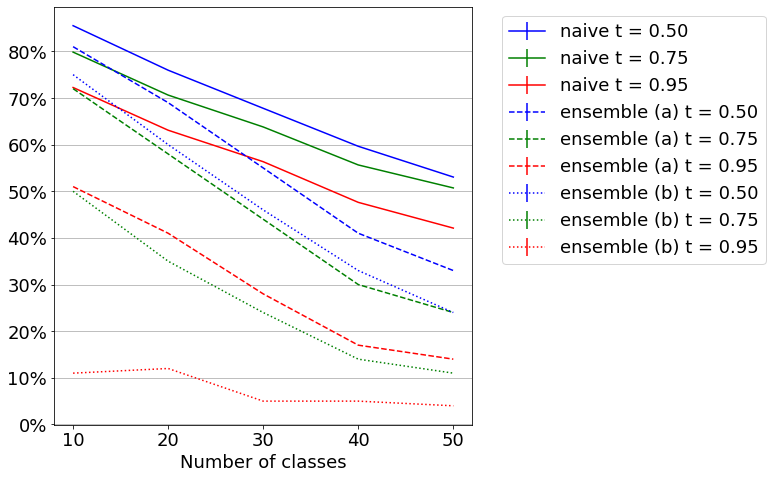

In [57]:
plot_test_accuracy(naive_cw_050_stats, naive_cw_075_stats, naive_cw_095_stats, var_cw, mean_cw)

# OWR: harmonic mean

In [58]:
jsonfile = open("states/owr/naive harmonic/050_test_accuracy.json")
naive_cw_050 = json.load(jsonfile)
naive_cw_050 = np.array(naive_cw_050)
naive_cw_050_stats = np.array([naive_cw_050.mean(0), naive_cw_050.std(0)]).transpose()

jsonfile = open("states/owr/naive harmonic/075_test_accuracy.json")
naive_cw_075 = json.load(jsonfile)
naive_cw_075 = np.array(naive_cw_075)
naive_cw_075_stats = np.array([naive_cw_075.mean(0), naive_cw_075.std(0)]).transpose()

jsonfile = open("states/owr/naive harmonic/095_test_accuracy.json")
naive_cw_095 =json.load(jsonfile)
naive_cw_095 = np.array(naive_cw_095)
naive_cw_095_stats = np.array([naive_cw_095.mean(0), naive_cw_095.std(0)]).transpose()

harmonic_var = [[0.13, 0.19, 0.23, 0.26, 0.28],
                [0.34, 0.37, 0.40, 0.39, 0.37],
                [0.56, 0.53, 0.50, 0.42, 0.35],
                [0.63, 0.56, 0.50, 0.38, 0.31],
                [0.61, 0.49, 0.37, 0.25, 0.20],
                [0.48, 0.37, 0.25, 0.17, 0.14],
                [0.20, 0.21, 0.09, 0.10, 0.14]]
harmonic_mean = [[0.00, 0.04, 0.06, 0.10, 0.15],
                 [0.06, 0.16, 0.21, 0.25, 0.29],
                 [0.31, 0.39, 0.40, 0.39, 0.37],
                 [0.46, 0.49, 0.47, 0.42, 0.38],
                 [0.59, 0.57, 0.51, 0.41, 0.36],
                 [0.65, 0.59, 0.50, 0.37, 0.32],
                 [0.62, 0.54, 0.42, 0.28, 0.24]]

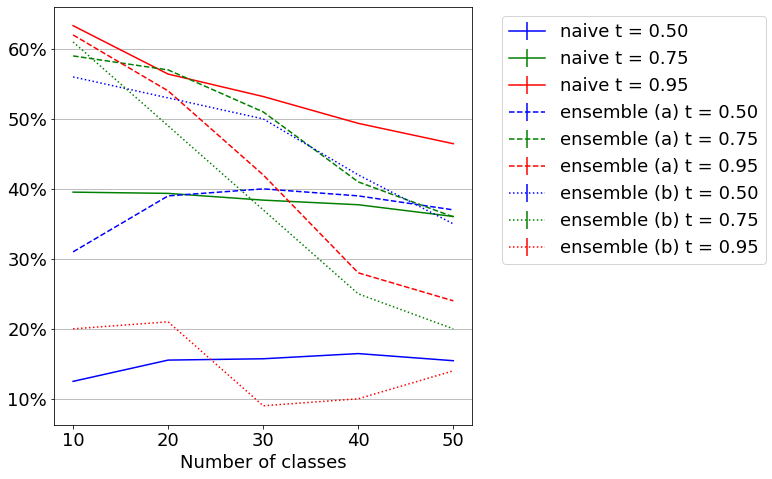

In [59]:
plot_test_accuracy(naive_cw_050_stats, naive_cw_075_stats, naive_cw_095_stats, harmonic_var, harmonic_mean)

# OWR final

In [ ]:
closed_var = [[0.83, 0.71, 0.59, 0.46, 0.36],
              [0.80, 0.67, 0.55, 0.41, 0.32],
              [0.75, 0.60, 0.46, 0.33, 0.24],
              [0.67, 0.52, 0.40, 0.26, 0.19],
              [0.50, 0.35, 0.24, 0.14, 0.11],
              [0.33, 0.23, 0.14, 0.09, 0.08],
              [0.11, 0.12, 0.05, 0.05, 0.04]]
harmonic_var = [[0.13, 0.19, 0.23, 0.26, 0.28],
                [0.34, 0.37, 0.40, 0.39, 0.37],
                [0.56, 0.53, 0.50, 0.42, 0.35],
                [0.63, 0.56, 0.50, 0.38, 0.31],
                [0.61, 0.49, 0.37, 0.25, 0.20],
                [0.48, 0.37, 0.25, 0.17, 0.14],
                [0.20, 0.21, 0.09, 0.10, 0.14]]
closed_mean = [[0.84, 0.72, 0.60, 0.48, 0.40],
               [0.83, 0.72, 0.59, 0.46, 0.37],
               [0.81, 0.69, 0.55, 0.41, 0.33],
               [0.78, 0.65, 0.51, 0.36, 0.29],
               [0.72, 0.58, 0.44, 0.30, 0.24],
               [0.66, 0.52, 0.38, 0.25, 0.20],
               [0.51, 0.41, 0.28, 0.17, 0.14]]
harmonic_mean = [[0.00, 0.04, 0.06, 0.10, 0.15],
                 [0.06, 0.16, 0.21, 0.25, 0.29],
                 [0.31, 0.39, 0.40, 0.39, 0.37],
                 [0.46, 0.49, 0.47, 0.42, 0.38],
                 [0.59, 0.57, 0.51, 0.41, 0.36],
                 [0.65, 0.59, 0.50, 0.37, 0.32],
                 [0.62, 0.54, 0.42, 0.28, 0.24]]

In [ ]:
def plot_accuracy(mean, var, save_directory = None):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 3), dpi = 900)
  x = np.arange(10, 51, 10)
  #ax1.errorbar(x, mean[0], 0, label = 't = 0.25', c = 'brown')
  #ax1.errorbar(x, mean[1], 0, label = 't = 0.35', c = 'yellow')
  ax1.errorbar(x, mean[2], 0, label = 't = 0.50', c = 'green')
  ax1.errorbar(x, mean[3], 0, label = 't = 0.60', c = 'blue')
  ax1.errorbar(x, mean[4], 0, label = 't = 0.75', c = 'purple')
  #ax1.errorbar(x, mean[5], 0, label = 't = 0.85', c = 'orange')
  ax1.errorbar(x, mean[6], 0, label = 't = 0.95', c = 'red')
  #ax2.errorbar(x, var[0], 0, label = 't = 0.25', c = 'brown')
  #ax2.errorbar(x, var[1], 0, label = 't = 0.35', c = 'yellow')
  ax2.errorbar(x, var[2], 0, label = 't = 0.50', c = 'green')
  ax2.errorbar(x, var[3], 0, label = 't = 0.60', c = 'blue')
  ax2.errorbar(x, var[4], 0, label = 't = 0.75', c = 'purple')
  #ax2.errorbar(x, var[5], 0, label = 't = 0.85', c = 'orange')
  ax2.errorbar(x, var[6], 0, label = 't = 0.95', c = 'red')
  ax1.set_xlabel("(a)")
  ax2.set_xlabel("(b)")
  plt.tight_layout()
  ax1.legend()
  ax2.legend()
  if save_directory != None:
    fig.savefig(save_directory)
  plt.show()

In [ ]:
plot_accuracy(closed_mean, closed_var, "closed_acc")